# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Febrika Suci Irianti
- **Email:** febrikasuci22@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan sepanjang waktu?
- Bagaimana distribusi geografis dari penjual dan pembeli?
- Tipe pembayaran apa yang paling banyak digunakan oleh pelanggan?
- Bagaimana tingkat pembatalan pesanan di E-Commerce?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [ ]:
cust_database=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
cust_database.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
ordtem_database=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
ordtem_database.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
paym_database=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
paym_database.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_database=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
order_database.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
seller_database=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
seller_database.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
cust_database.info()
cust_database.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
paym_database.info()
paym_database.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
order_database.info()
order_database.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
ordtem_database.info()
ordtem_database.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
seller_database.info()
seller_database.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
cust_database.duplicated().sum()
paym_database.duplicated().sum()
order_database.duplicated().sum()
ordtem_database.duplicated().sum()
seller_database.duplicated().sum()

0

**Insight:**
- Pada **cust_database**, tipe data yang dimiliki setiap kolom sudah tepat. Tidak ada data yang kosong dan tidak memiliki data  yang terduplikasi.
- Pada **paym_database**, tipe data yang dimiliki setiap kolom sudah tepat. Tidak ada data yang kosong dan tidak memiliki data  yang terduplikasi.
- Pada **order_database**, terdapat beberapa kolom yang memiliki tipe data yang salah. Kolom-kolom tersebut adalah **order_delivered_carrier_date, order_delivered_customer_date,** dan **order_estimated_delivery_date** dimana tipe data yang tepat adalah **datetime**. Selain itu, database ini terdapat beberapa data yang kosong namun hal ini dapat terjadi sebab adanya pembatalan pesanan yang menyebabkan tidak adanya data tanggal pesanan diterima.
- Pada **ordtem_database**, kolom **shipping_limit_date** memiliki tipe data yang salah dimana tipe data yang benar adalah **datetime**. Namun, pada database ini tidak ada data yang kosong dan tidak memiliki data yang terduplikasi.
- Pada **seller_database**, tipe data yang dimiliki setiap kolom sudah tepat. Tidak ada data yang kosong dan tidak memiliki data  yang terduplikasi.

### Cleaning Data

Akan dilakukan pengubahan data type pada order_database yang semula **object** menjadi **datetime**

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  order_database[column] = pd.to_datetime(order_database[column])

order_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Selanjutnya, akan dilakukan pula perubahan tipe data pada **ordtem_database**

In [ ]:
datetime_ordtem = ["shipping_limit_date"]

for column in datetime_ordtem:
  ordtem_database[column] = pd.to_datetime(ordtem_database[column])

ordtem_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Setelah dilakukan perubahan tipe data, **order_database** telah memiliki tipe data yang **benar** pada setiap kolomnya.
- Begitu pula dengan **ordtem_database** yang telah memiliki tipe data yang sesuai

## Exploratory Data Analysis (EDA)

In [ ]:
cust_database.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
paym_database.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
ordtem_database.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [ ]:
order_database.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [ ]:
seller_database.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Dalam **cust_database**, terdapat **99,441 customer_id** dengan customer_id yang bersifat **unique** sejumlah **96,096**.
- Dalam **paym_database**, dari **103886** entri pada kolom **order_id**, hanya **9940** yang **unique**, dengan **satu order_id** muncul hingga **29 kali**. Terdapat **5 tipe pembayaran** dimana pembayaran paling banyak dilakukan dengan menggunakan **credit_card**. Pembayaran dilakukan **rata-rata** rata sebesar **154.1** dengan maksimal sebesar **13,664**
- Dalam **ordtem_database**, terdapat **112,650 order_id** dengan nilai **unique** sebanyak **98,666**. Produk yang dijual memiliki **32,961** nilai **unique** pada kolom **product_id** dan melibatkan **3,095 seller_id** unique. **Harga rata-rata** produk adalah **120.6** dengan **harga maksimum** mencapai **6735**, sementara **rata-rata** biaya pengiriman (**freight_value**) adalah **19.9** dengan **maksimum 409.6**.
- **Dalam order_database**, terdapat **order_id** sebanyak **112,650** dengan **order_status** paling banyak adalah **delivered** sebanyak **96,478**.
- Dalam **seller_database**, terdapat **3095 seller_id** yang tersebar dalam **611 seller_city** dan **23 seller_state**, dengan seller terbanyak berada di kota **Sao Paulo** dan negara bagian **SP**.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

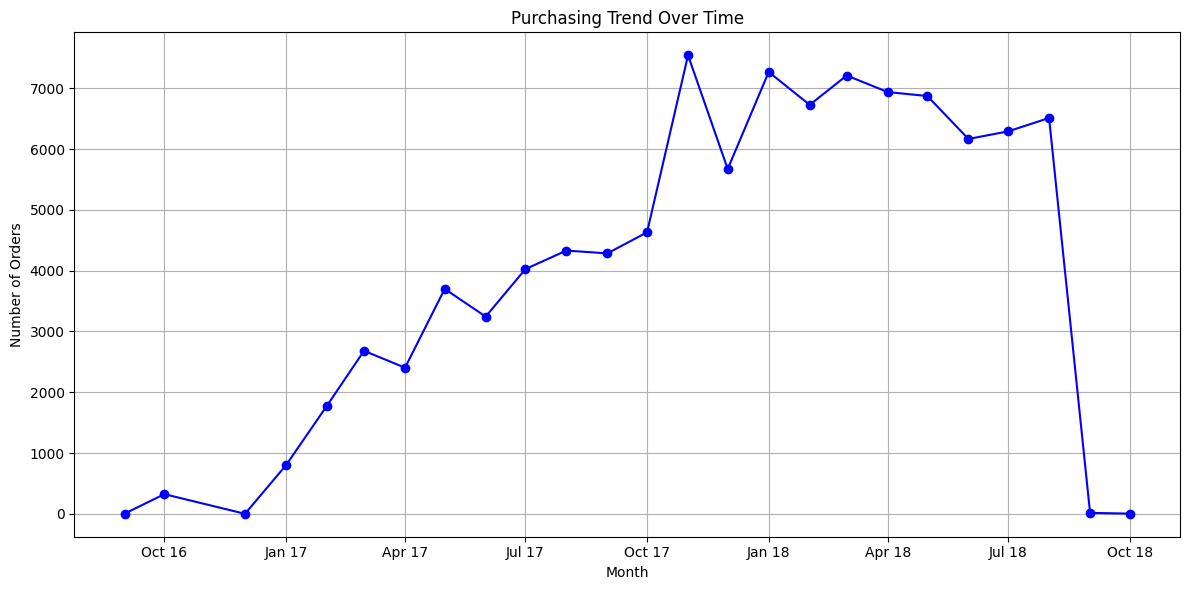

In [ ]:
purchase_trend = order_database.groupby(order_database['order_purchase_timestamp'].dt.to_period('M')).size()

purchase_trend = purchase_trend.to_frame(name='order_count').reset_index()
purchase_trend['order_purchase_timestamp'] = purchase_trend['order_purchase_timestamp'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(purchase_trend['order_purchase_timestamp'], purchase_trend['order_count'], marker='o', color='blue')
plt.title('Purchasing Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # %b untuk bulan (Jan, Feb), %y untuk tahun dua digit
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Menemukan pesanan tertinggi dan terendah
max_point = purchase_trend.loc[purchase_trend['order_count'].idxmax()]
min_point = purchase_trend.loc[purchase_trend['order_count'].idxmin()]

# Menampilkan pesanan tertinggi dan terendah
print("Puncak Tertinggi:")
print(f"Bulan: {max_point['order_purchase_timestamp'].strftime('%b %Y')}, Jumlah Pesanan: {max_point['order_count']}")

print("\nPuncak Terendah:")
print(f"Bulan: {min_point['order_purchase_timestamp'].strftime('%b %Y')}, Jumlah Pesanan: {min_point['order_count']}")

Puncak Tertinggi:
Bulan: Nov 2017, Jumlah Pesanan: 7544

Puncak Terendah:
Bulan: Dec 2016, Jumlah Pesanan: 1


**Insight:**

- Pembelian cenderung **meningkat** setiap bulan, menunjukkan tren pertumbuhan dalam volume pembelian.
- Pembelian tertinggi terjadi di bulan **November 2017**, dengan jumlah pesanan mencapai **7,544**.
- Terjadi penurunan yang sangat signifikan antara **Agustus 2018** (**6512** pesanan) dan **September 2018** (**16** pesanan), yaitu sekitar **99.75%**.
-  Pembelian **paling sedikit** terjadi pada bulan **Desember 2016** yang hanya terdapat **1** pesanan.

### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

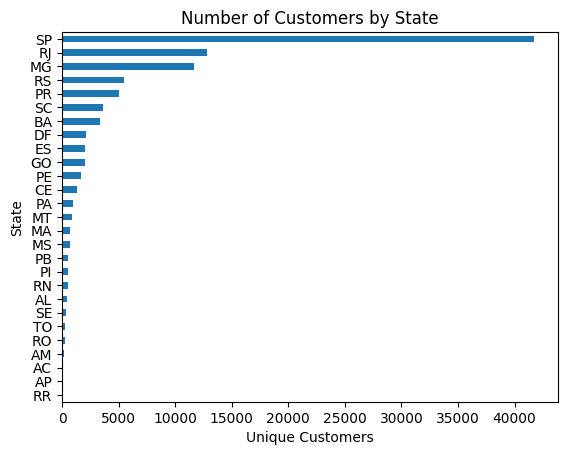

In [ ]:
state_cust=cust_database.groupby(by="customer_state").agg({
    "customer_id":"nunique"
}).rename(columns={'customer_id':'unique_cust'}).sort_values(by="unique_cust",ascending=False)

#buat plot
plt.figure(figsize=(10,6))
state_cust.plot(kind='barh',y='unique_cust',legend=False)
plt.xlabel("Unique Customers")
plt.ylabel("State")
plt.title("Number of Customers by State")

#menampilkan plot
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cust_database.groupby(by="customer_state").agg({
    "customer_id":"nunique"
}).rename(columns={'customer_id':'unique_cust'}).sort_values(by="unique_cust",ascending=False).head(3)

,unique_cust
customer_state,
SP,41746
RJ,12852
MG,11635


**Insight:**

- Negara bagian **SP (São Paulo)** memiliki jumlah pelanggan terbanyak, yaitu sebanyak **41,746 orang**, menegaskan posisinya sebagai pusat aktivitas e-commerce terbesar di Brasil.
- **RJ (Rio de Janeiro)** berada di posisi **kedua** dengan **12,852 pelanggan**, diikuti oleh **MG (Minas Gerais)** dengan **11,635 pelanggan.**
- Tiga negara bagian dengan jumlah pelanggan **terendah** adalah **AC (Acre)**, **RR (Roraima)**, dan **AP (Amapá)**, menunjukkan rendahnya transaksi e-commerce di wilayah utara Brasil

<Figure size 1000x600 with 0 Axes>

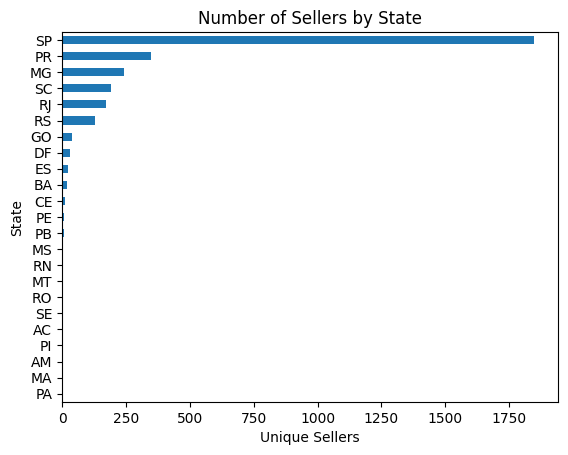

In [ ]:
state_seller=seller_database.groupby(by="seller_state").agg({
    "seller_id":"nunique"
}).rename(columns={'seller_id':'unique_sellers'}).sort_values(by="unique_sellers",ascending=False)

#buat plot
plt.figure(figsize=(10,6))
state_seller.plot(kind='barh',y='unique_sellers',legend=False)
plt.xlabel("Unique Sellers")
plt.ylabel("State")
plt.title("Number of Sellers by State")

#menampilkan plot
plt.gca().invert_yaxis()
plt.show()

In [ ]:
seller_database.groupby(by="seller_state").agg({
    "seller_id":"nunique"
}).rename(columns={'seller_id':'unique_sellers'}).sort_values(by="unique_sellers",ascending=False).head(3)

,unique_sellers
seller_state,
SP,1849
PR,349
MG,244


**Insight:**

- Negara bagian **SP (São Paulo)** memiliki jumlah penjual terbanyak, yaitu sebanyak **1849 orang**.
- **PR (Paraná)** berada di posisi **kedua** dengan **349 penjual**, diikuti oleh **MG (Minas Gerais)** dengan **244 penjual.**
- Tiga negara bagian dengan jumlah penjual **terendah** adalah **AM (Amazonas)**, **MA (Maranhão)**, dan **PA (Pará)**, menunjukkan rendahnya jumlah penjual e-commerce di wilayah utara dan timur Brasil.

### Pertanyaan 3:

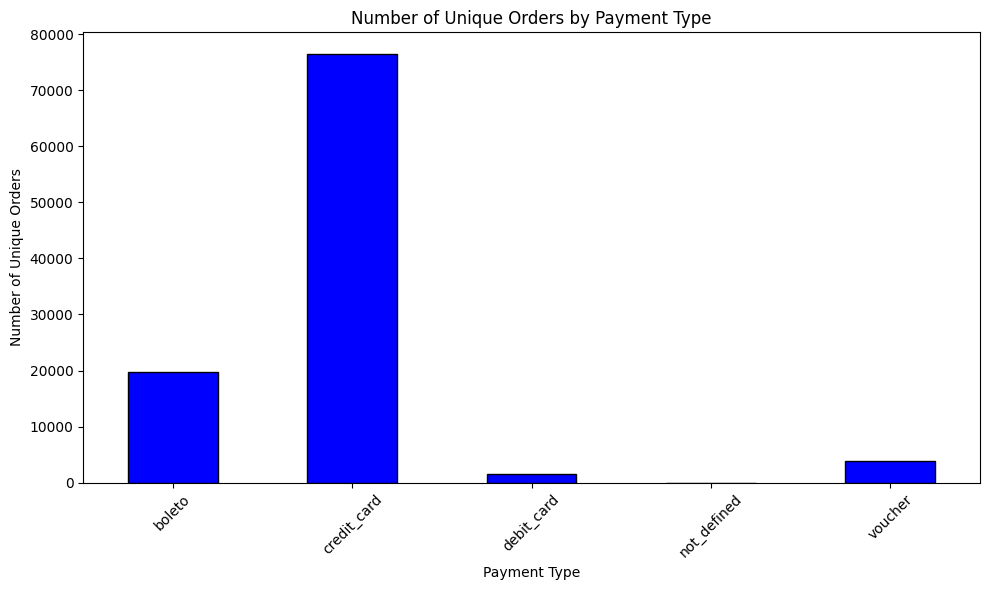

In [ ]:
# Membuat pivot table dengan menghitung jumlah pesanan unik (order_id) untuk setiap payment_type
pivot_table = paym_database.groupby('payment_type').agg({
    'order_id': 'nunique'
}).rename(columns={'order_id': 'unique_orders'})

# Plot hasil pivot table
plt.figure(figsize=(10, 6))
pivot_table['unique_orders'].plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Unique Orders by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()

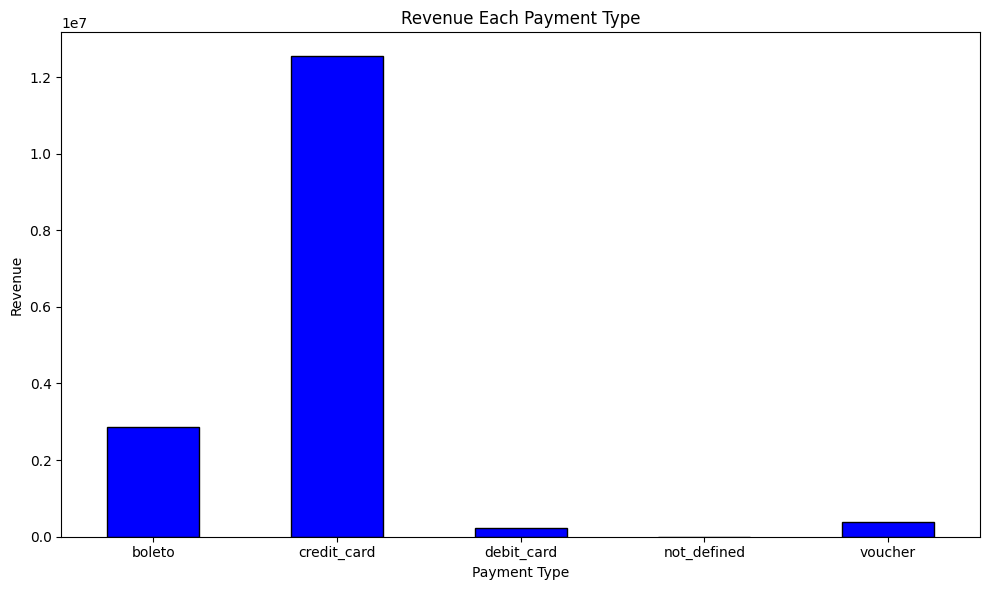

In [ ]:
# Membuat pivot table dengan menghitung jumlah pesanan unik (order_id) untuk setiap payment_type
pvt_table = paym_database.groupby('payment_type').agg({
    'payment_value': 'sum'
})

# Plot hasil pivot table
plt.figure(figsize=(10, 6))
pvt_table['payment_value'].plot(kind='bar', color='blue', edgecolor='black')
plt.title('Revenue Each Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
paym_database.groupby(by="payment_type").agg({
    "order_id":"nunique",
    "payment_value":"sum"
})


,order_id,payment_value
payment_type,,
boleto,19784,2869361.27
credit_card,76505,12542084.19
debit_card,1528,217989.79
not_defined,3,0.00
voucher,3866,379436.87


**Insight:**

- **credit_card** adalah metode yang **paling banyak** digunakan, dengan **76.505 orang** yang melakukan transaksi dan total **payment_value** sebesar **12.542.084,19.**
- Metode pembayaran dengan **boleto** berada di urutan kedua dengan **19.784 orang** yang menggunakannya, dengan total **payment_value** mencapai **2.869.361,27**.
- Penggunaan **debit_card** relatif **rendah**, hanya melibatkan **1.528 orang** dan total **payment_value** sebesar **217.989,79**, yang menunjukkan bahwa debit_card **jarang** digunakan dibandingkan dengan metode pembayaran lainnya.
- Di sisi lain, **voucher** digunakan oleh **3.866 orang** dengan total **payment_value** sebesar **379.436,87**, yang meskipun tidak sebesar kartu kredit atau boleto, tetap menunjukkan tingkat penggunaan yang cukup signifikan.
- Terdapat **3 orang** yang melakukan pembayaran dengan status **not_defined**, namun dengan total **payment_value** sebesar **0.00**, yang mengindikasikan adanya data yang tidak lengkap atau pembayaran yang tidak tercatat dengan benar.

### Pertanyaan 4:

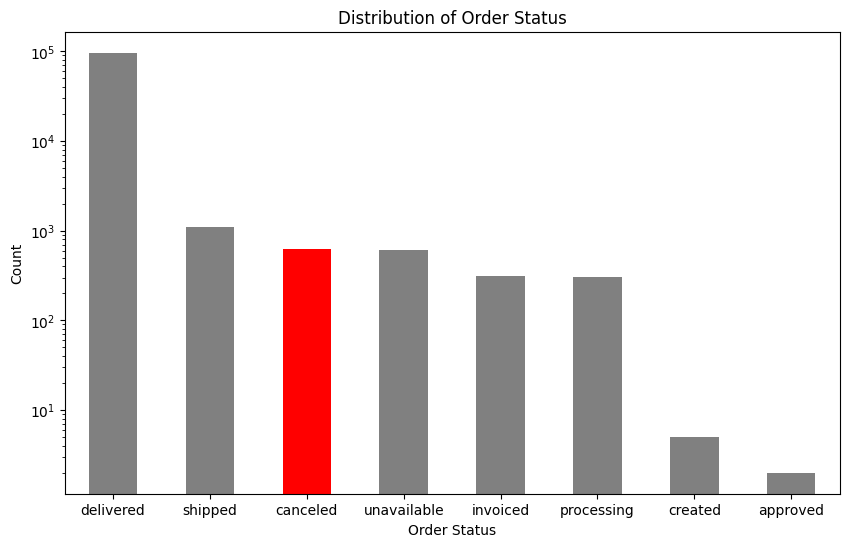

In [ ]:
order_df=order_database.groupby(by='order_status').agg({
    'order_id':'nunique'}).rename(columns={'order_id':'unique_order'}).sort_values(by="unique_order",ascending=False)

colors = ['grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey']

#buat plot
plt.figure(figsize=(10,6))
order_df['unique_order'].plot(kind='bar',color=colors)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

In [ ]:
order_database.groupby(by='order_status').agg({
    'order_id':'nunique'
})

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


Grafik diatas menunjukkan jumlah dari setiap order status dimana **delivered** merupakan **order_status paling banyak**. Namun, dapat diperhatikan juga bahwa **canceled** berada pada posisi **ketiga** sehingga akan dilihat bagaimana tren canceled dari waktu ke waktu.

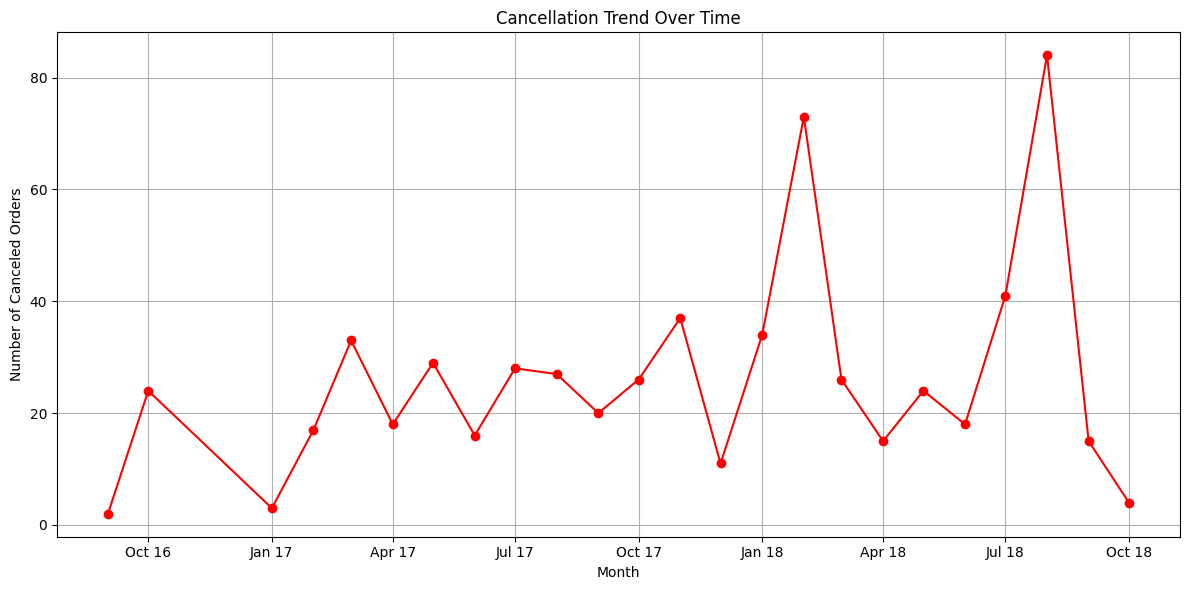

In [ ]:
# Filter data untuk payment_status yang "canceled"
canceled_orders = order_database[order_database['order_status'] == 'canceled']

# Kelompokkan data berdasarkan tahun dan bulan, lalu hitung jumlah pesanan yang dibatalkan per bulan
cancellation_trend = canceled_orders.groupby(canceled_orders['order_purchase_timestamp'].dt.to_period('M')).size()

# Konversi hasilnya menjadi DataFrame dan reset index untuk keperluan plotting
cancellation_trend = cancellation_trend.to_frame(name='cancellation_count').reset_index()
cancellation_trend['order_purchase_timestamp'] = cancellation_trend['order_purchase_timestamp'].dt.to_timestamp()

# Buat line plot
plt.figure(figsize=(12, 6))
plt.plot(cancellation_trend['order_purchase_timestamp'], cancellation_trend['cancellation_count'], marker='o', color='red')
plt.title('Cancellation Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Canceled Orders')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # %b untuk bulan (Jan, Feb), %y untuk tahun dua digit
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Menemukan puncak tertinggi dan terendah
max_point = cancellation_trend.loc[cancellation_trend['cancellation_count'].idxmax()]
min_point = cancellation_trend.loc[cancellation_trend['cancellation_count'].idxmin()]

# Menampilkan puncak tertinggi dan terendah
print("Pembatalan Tertinggi:")
print(f"Bulan: {max_point['order_purchase_timestamp'].strftime('%b %Y')}, Jumlah Pembatalan: {max_point['cancellation_count']}")

print("\nPembatalan Terendah:")
print(f"Bulan: {min_point['order_purchase_timestamp'].strftime('%b %Y')}, Jumlah Pembatalan: {min_point['cancellation_count']}")


Pembatalan Tertinggi:
Bulan: Aug 2018, Jumlah Pembatalan: 84

Pembatalan Terendah:
Bulan: Sep 2016, Jumlah Pembatalan: 2


**Insight:**
- Dalam grafik **Distribution of Order Status**, **canceled** berada di posisi **ketiga** setelah delivered dan shipped, dengan **625 pembatalan**, menunjukkan **tingkat pembatalan yang relatif tinggi**.
- Pembatalan **paling banyak** terjadi di bulan **Agustus 2018** yaitu sebanyak **84 pembatalan**.
- Pembatalan **paling sedikit** dilakukan pada bulan **September 2016**.

## Conclusion

- **Performa Penjualan:** Penjualan menunjukkan **tren peningkatan** setiap bulan dengan **puncak tertinggi** pada **November 2017**, namun terjadi **penurunan signifikan** pada **September 2018**.
- **Distribusi Geografis:** **SP** memiliki jumlah pelanggan dan penjual **terbanyak**, sementara wilayah utara Brasil, seperti **AC, RR, dan AP**, menunjukkan aktivitas e-commerce yang **rendah**.
- **Tipe Pembayaran:** **Kartu kredit** adalah metode pembayaran **paling dominan**, diikuti oleh **boleto**, dengan **debit card** yang **jarang** digunakan.
- **Pembatalan Pesanan:** Pembatalan pesanan **cukup tinggi**, dengan **puncak tertinggi** pada **Agustus 2018** dan yang **terendah** pada **September 2016**.